**Copyright: © NexStream Technical Education, LLC**.
All rights reserved

# Building a Deep Neural Network with a Custom Framework
In this project, you will implement a deep neural network from scratch using standard Python and Numpy libraries.  Please complete the following steps in your Colab Script. The reference script below provides template code and hints to help with each step. You will be turning in code and screenshots of your console output in an accompanying assignment.

The following instructions are identified as Steps in the text cells preceding their corresponding code cell. Read through the instructions and write/fill-in the appropriate code in the cells.

##Part A:  Dataset Creation and Preprocessing



In this section, you will set up your drive, create a synthetic dataset, and preprocess the data in preparation for deep network algorithms.  Please follow the steps outlined in the following cells and fill in your code where prompted.
<br>


**Step A-1:**
- Mount your Google drive.
- Upload the utility files indicated in the code cell below from the materials folder provided with this course and copy them to your project directory.
- Import the required libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#See the reference cp commands below.  Update this to your own drive path.
#!cp drive/MyDrive/MachineLearning/DNN/tf_image_utils_v2.py .
#!cp drive/MyDrive/MachineLearning/DNN/h5py_image_utils.py .
#!cp drive/MyDrive/MachineLearning/DNN/train_catvnocat.h5 .
#!cp drive/MyDrive/MachineLearning/DNN/test_catvnocat.h5 .

Mounted at /content/drive


In [ ]:
#drive.mount('/content/drive/', force_remount=True)
# cd (change directory) to the folder which contains the dataset
# YOUR CODE HERE...
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import numpy as np

import h5py
import h5py_image_utils
from h5py_image_utils import *
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

#from google.colab import files

import tensorflow as tf
import tensorflow_datasets as tfds
import tf_image_utils_v2
from tf_image_utils_v2 import *


**Step A-2:** Create a Synthetic Dataset

- Use the following code cells to generate synthetic data and create the train and test datasets.
- Print the shapes of the datasets.  Your shapes output should be the following:
  - X is of shape:  (10, 5)
  - Y is of shape:  (1, 5)
- Verify the doctest modules included in the cells run without any errors

In [ ]:
# Example data.
np.random.seed(0) #do not change - for grading purposes

x_example = np.random.randn(10, 5)
y_example = np.array([1, 0, 0, 1, 1])
y_example = y_example.reshape(1, y_example.shape[0])

print ("X is of shape: ", x_example.shape)
print ("Y is of shape: ", y_example.shape)
print(x_example)

import doctest
"""
  >>> print(x_example.shape)
  (10, 5)
  >>> print(y_example.shape)
  (1, 5)
"""

doctest.testmod()


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/doctest.py", line 1501, in run
    sys.settrace(save_trace)



X is of shape:  (10, 5)
Y is of shape:  (1, 5)
[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799]
 [-0.97727788  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351  0.76103773  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462]
 [-1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]
 [ 0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215]
 [ 0.15634897  1.23029068  1.20237985 -0.38732682 -0.30230275]
 [-1.04855297 -1.42001794 -1.70627019  1.9507754  -0.50965218]
 [-0.4380743  -1.25279536  0.77749036 -1.61389785 -0.21274028]]


TestResults(failed=0, attempted=2)

## Part 1:  The Framework

### 1.1  Layer Class
In this section you will create a Layer class.  Test your code using the example data in the following code cell.  Complete the following steps and refer to the previous lecture units for guidance.
- Step 1-1a:  Create the Layer class.
- Step 1-1b:  Write the class constructor.
- Step 1-1c:  Write the sigmoid, relu, and tanh activation functions.
- Step 1-1d:  Write the activation_backward function to compute the derivatives of the activations.

![alt text](https://docs.google.com/uc?export=download&id=1Fpx-NYPbNeaRiCg6ZBHZrRu754mcurX-)


In [ ]:
class Layer:

  #Constructor parameter order: output_units, input_units, activation, initialization
  #   set initialization default to 'he'
  #def __init__(self, None, None, None, None='None'):
  def __init__(self, output_units, input_units, activation, initialization='he'):

    # He initialization
    if initialization == 'he':
      self.weights = np.random.randn(output_units, input_units)  * np.sqrt((2/input_units))

    # Random initialization
    if initialization == 'random':
      self.weights = np.random.randn(output_units, input_units) * 0.01

    #self.biases = None
    self.biases = np.zeros((output_units, 1))

    # Create an instance variable for the activation function
    #self.activation = None
    self.activation = activation

  #Sigmoid activation:  return the activation of Z applied to the sigmoid function
  def sigmoid(self, Z):
    #return None
    return 1 / (1 + np.exp(-Z))

  #ReLu activation:  return the activation of Z applied to the ReLu function
  def relu(self, Z):
    #return None
    return np.maximum(0, Z)

  #Tanh activation:  return the activation of Z applied to the tanh function
  #Note, use the numpy tanh function here
  def tanh(self, Z):
    #return None
    return np.tanh(Z)

  # Backward activations
  # Computes the derivatives of activation functions.
  #def activation_backwards(self, dA):

    # Check the activation function then calc the activiation gradient
    #       (e.g. sigmoid_grad, relu_grad, tanh_grad)
    #Sigmoid
    #if self.activation == 'sigmoid':
      #Calculate the sigmoid gradient
      #None = None
      #Calculate dZ by multiplying dA and activation_grad
      #dZ = None
      #return dZ

    #ReLu
    #if None == 'None':
      #Calculate the ReLu gradient
      #None = None
      #Calculate dZ by multiplying dA and activation_grad
      #dZ = None
      #return dZ

    #Tanh
    #if None == 'None':
      #Calculate the tanh gradient
      #None = None
      #Calculate dZ by multiplying dA and activation_grad
      #dZ = None
      #return dZ
  #def tanh(self, Z):
    #return np.tanh(Z)

  def activation_backwards(self, dA):
    if self.activation == 'sigmoid':
    # Calculate the sigmoid gradient using stored Z
     sigmoid_grad = self.sigmoid(self.Z) * (1 - self.sigmoid(self.Z))
    # Calculate dZ by multiplying dA and activation_grad
     dZ = dA * sigmoid_grad
     return dZ

    if self.activation == 'relu':
    # Calculate the ReLu gradient using stored Z
     relu_grad = np.where(self.Z > 0, 1, 0)
    # Calculate dZ by multiplying dA and activation_grad
     dZ = dA * relu_grad
     return dZ

    if self.activation == 'tanh':
    # Calculate the tanh gradient using stored Z
     tanh_grad = 1 - np.power(np.tanh(self.Z), 2)
    # Calculate dZ by multiplying dA and activation_grad
     dZ = dA * tanh_grad

     return dZ


   #Abstract methods - will complete in child classes
  def forward(self):
    pass

  def backward(self):
    pass

  def update(self):
    pass

**Step 1.1e:**  Layer Class Instantiation
Instantiate a layer with input units equal to the number of features in x_example, 5 output units, and relu activation. Print out the weights and biases.


In [ ]:
# instantiate a layer.
np.random.seed(0) #do not change - for grading purposes

#Create a layer reference by instantiating a Layer object with:
#  num of output units =5,
#  num of input units = shape of x_example (from the dataset creation section),
#  activation = relu
#layer = None
layer = Layer(5, x_example.shape[0], 'relu')

#print ("Weights: \n", layer.weights)
#print ("Biases: \n", layer.biases)


import doctest

"""
  >>> print(np.round(layer.weights[0][0], 3))
  0.789
  >>> print(np.round(layer.weights[4][0], 3))
  -0.469
  >>> print(np.round(layer.biases[0][0], 1))
  0.0
"""

doctest.testmod()

TestResults(failed=0, attempted=3)

**Step 1.1f:**  Layer Class FeedForward - forward step
Compute forward step for a single layer.

![alt text](https://docs.google.com/uc?export=download&id=1TRGzgXctY_aN9aDWO2EhVe1JkfgLhb1S)


In [ ]:
# Compute forward step for a single layer.
def forward(layer, input):

  # Create an instance variable for the input.
  #layer.input = None
  layer.input = input


  # Calculate Z using the weights, biases, and input of this layer,
  # then store Z in an instance variable
  #Z = None
  #layer.Z = None
  Z = np.dot(layer.weights, input) + layer.biases
  layer.Z = Z


  # Check which activation function was set in your layer instance
  # (see previous test cell), then call the correct method.
  # e.g. if layer.activation == "sigmoid": A = layer.sigmoid(Z)

 # if None == "None":
    #A = layer.sigmoid(Z)

  #elif None == "None":
    #A = None

  #elif None == 'None':
    #A = None

  if layer.activation == "sigmoid":
    A = layer.sigmoid(Z)

  elif layer.activation == "relu":
    A = layer.relu(Z)

  elif layer.activation == 'tanh':
    A = layer.tanh(Z)

  # Store the activation result as an instance variable and return it.
  #layer.A = None
  layer.A = A
  return A

**Step 1.1g:**  Layer Class FeedForward - forward method call for the layer
Calculate A for your example data with the layer you previously instantiated.

In [ ]:
# Calculate A for your example data with the layer you previously instantiated.
# by calling the forward method and pass to it your layer instance and the dataset (x_example)

#A = None
A = forward(layer, x_example)

print(layer.Z.shape)
print(layer.A.shape)
print ("A: \n", A)

assert (layer.Z.shape == (layer.weights.shape[0], layer.A.shape[1]))
assert (layer.A.shape == (layer.weights.shape[0], layer.input.shape[1]))

import doctest

"""
  >>> print(layer.Z.shape)
  (5, 5)
  >>> print(layer.Z.shape)
  (5, 5)
  >>> print(np.round(layer.A[0][0], 3))
  0.141
  >>> print(np.round(layer.A[4][2], 3))
  0.79
"""

doctest.testmod()

(5, 5)
(5, 5)
A: 
 [[0.14082542 3.05836426 1.43926944 0.         1.99575878]
 [0.         1.77602343 0.         0.         0.96692557]
 [0.         0.         0.         0.         0.        ]
 [0.30989993 0.         0.12274639 0.         0.29186782]
 [1.60744178 0.60481148 0.79011514 0.         0.        ]]


TestResults(failed=0, attempted=4)

**Step 1.1h:**  Layer Class Back Propagation - backward method call for the layer
Calculate the backward step.


![alt text](https://docs.google.com/uc?export=download&id=12sXyoW-HZ0BKSqENnFBuf4GXJviBqYxL)


<br>

Where *weights* = $W^T$
See the lecture material for more details on these calculations.
Regarding dA_prev, recall:

$$\frac{\partial E}{\partial A^{[L-1]}}=\frac{\partial E}{\partial X^{[L]}}$$
and
$$\frac{\partial E}{\partial X}=W^T\cdot\frac{\partial E}{\partial Z}$$

<br>

Hints:
- For *da_prev*,  don't forget to tranpose the weights matrix
- For *dB*,  use np.sum with axis=1 and keepdims=True

In [ ]:
def backward(layer, dA_prev):

  # Calculate dZ by calling the activation_backwards() method from your Layer class
  # and pass to it dA_prev
  #dZ = None
  dZ = layer.activation_backwards(dA_prev)

  # Extract the number of examples from the shape of the input instance variable
  # that you created in your forward method.
  #m = None
  m = layer.input.shape[1]

  # Calculate dW and db using the input to this layer (ie the activation of the previous layer).
  # For db,
  #layer.dW = None
  #layer.db = None
  layer.dW = 1/m * np.dot(dZ, layer.input.T)
  layer.db = 1/m * np.sum(dZ, axis=1, keepdims=True)

  # Calculate dW and db using the input to this layer (ie the activation of the previous layer).
  #dA_prev = None
  dA_prev = np.dot(layer.weights.T, dZ)


  return dA_prev

**Step 1.1i:**  Layer Class Back Propagation - Calculate the derivative of the error (cost) function between the output layer activation and the label Y.
dAL is the derivative of the cost function with respect to the output of the final layer.

For the cost, use the binary cross entropy loss function:

$$cost=\frac{-1}{m}*\sum [Y*log(AL) + (1-Y)*log(1-AL)]$$

And the derivative of the cost is:
$$dAL = -\bigl(\frac{Y}{AL+\epsilon}-\frac{1-Y}{1-AL+\epsilon}\bigr)$$


Confirm your outputs pass the doctests in the cell.

In [ ]:
# Calculate the derivative of the output.

#dAL = None
Y=y_example
#dAL = - (np.divide(y_example, A) - np.divide(1 - y_example, 1 - A))
# prevent divide by zero errors, as we deal with  binary cross-entropy loss with a sigmoid activation. Sigmoid function can sometimes output exactly 0 or 1, causing division by zero in the gradient computation.

epsilon = 1e-8

dAL = - (np.divide(Y, A + epsilon) - np.divide(1 - Y, 1 - A + epsilon))

print ("dAL: \n", dAL)

import doctest

"""
  >>> print(np.round(dAL[0][0], 3))
  -7.101
  >>> print(np.round(dAL[0][2], 3))
  -2.277
  >>> print(np.round(dAL[3][2], 3))
  1.14
"""

doctest.testmod()

dAL: 
 [[-7.10099043e+00 -4.85822663e-01 -2.27650715e+00 -1.00000000e+08
  -5.01062555e-01]
 [-1.00000000e+08 -1.28862090e+00  9.99999990e-01 -1.00000000e+08
  -1.03420576e+00]
 [-1.00000000e+08  9.99999990e-01  9.99999990e-01 -1.00000000e+08
  -1.00000000e+08]
 [-3.22684795e+00  9.99999990e-01  1.13992120e+00 -1.00000000e+08
  -3.42620841e+00]
 [-6.22106508e-01  2.53043781e+00  4.76451693e+00 -1.00000000e+08
  -1.00000000e+08]]


TestResults(failed=0, attempted=3)

**Step 1.1j:**  Layer Class Back Propagation - derivative of previous layer
Calculate dA_prev, the derivative of the activation of the previous layer using the backward function.


In [ ]:
# Calculate the derivative of the activation of the previous layer using the backward function.

# Call the backward method and pass to it the layer instance and dAL
#dA_prev = None

dA_prev = backward(layer, dAL)


print ("dA_prev: \n", dA_prev)
assert (dA_prev.shape == layer.input.shape)
assert (layer.dW.shape == layer.weights.shape)
assert (layer.db.shape == layer.biases.shape)


import doctest

"""
  >>> print(np.round(dA_prev[0][0], 3))
  -5.534
  >>> print(np.round(dA_prev[0][2], 3))
  -3.951
  >>> print(np.round(dA_prev[6][2], 3))
  -3.009
"""

doctest.testmod()

dA_prev: 
 [[-5.53391002 -1.65287114 -3.95117607  0.         -0.6993318 ]
 [-1.42141612 -2.53198016 -3.24032402  0.         -1.34172371]
 [-1.35227447 -2.58211865 -5.08466788  0.          0.78900126]
 [-4.80057955  1.65059658  0.86542143  0.          2.47664959]
 [-5.28686694 -1.23829714 -3.16463903  0.         -0.09069034]
 [ 2.99975469 -0.47570814  0.14122699  0.         -0.17490287]
 [-4.44403197 -2.4851645  -3.00948514  0.         -2.7890347 ]
 [-1.4707928   1.03095926  2.42369645  0.         -1.71353854]
 [ 1.33574525 -1.98435276 -3.53119284  0.          0.47181262]
 [-0.80848343  0.16224977 -1.02543233  0.          0.76622332]]


TestResults(failed=0, attempted=3)

**Step 1.1k:**  Layer Class Back Propagation - update
Update the layer weights and biases.


![alt text](https://docs.google.com/uc?export=download&id=18cw_sLHVkAs_1ekztijXzj0GcCtaF0Gy)


In [ ]:
def update(layer, learning_rate):

  # Update the parameters using the instance variables constructed
  # from the Layer class for your layer instance.
  #layer.weights = None
  #layer.biases = None
  layer.weights = layer.weights - learning_rate * layer.dW
  layer.biases = layer.biases - learning_rate * layer.db


**Step 1.1l:** Layer Class Back Propagation - update method call
Call the update method with a learning rate of 0.001.

<br>

TESTING NOTE:  If you need to run this cell (e.g. to debug your code) more than one time sucessively, you will need to rerun the preceding initialization steps since the instance variables in the Layer class (i.e. the weights and biases) will assume new values and therefore will be used as the stored values for each subsequent call.  This in turn will result in your doctests failing since they are built upon the first update following the initialization steps.

In [ ]:
# Call the update function.

# Call the update method and pass your layer instance and learning rate.
#update(None, None)

learning_rate = 0.001

update(layer, learning_rate)

print ("Updated weights: \n", layer.weights)
print ("Updated biases: \n", layer.biases)


import doctest

"""
  >>> print(np.round(layer.weights[0][0], 3))
  0.792
  >>> print(np.round(layer.weights[3][5], 3))
  0.07
  >>> print(np.round(layer.biases[0][0], 3))
  0.002
  >>> print(np.round(layer.biases[3][0], 3))
  0.001

"""

doctest.testmod()

Updated weights: 
 [[ 0.79208515  0.17763236  0.43844179  1.00259796  0.83225612 -0.43905097
   0.42471018 -0.06683026 -0.04861594  0.18321403]
 [ 0.06490766  0.65070067  0.34081303  0.05462312  0.1991396   0.14953941
   0.66819797 -0.09149502  0.13953674 -0.38233011]
 [-1.14173175  0.29230712  0.38658762 -0.33190629  1.01506513 -0.6504121
   0.02046383 -0.08371116  0.6854797   0.65711722]
 [ 0.07148965  0.16880458 -0.39680625 -0.88616226 -0.15588041  0.07003232
   0.55026671  0.53734024 -0.17385476 -0.13579965]
 [-0.46984281 -0.63550952 -0.76451049  0.87189416 -0.22939554 -0.19593853
  -0.55959325  0.34595532 -0.71954296 -0.0953017 ]]
Updated biases: 
 [[ 0.00207288]
 [ 0.00046457]
 [ 0.        ]
 [ 0.00110263]
 [-0.00133457]]


TestResults(failed=0, attempted=4)

### 1.2  Dense Class
In this section you will create a Dense class, which is a child of the Layer class.  You will test your code using the example data in the next section.  Complete the following steps and refer to the previous lecture units for guidance.
- Step 1.2a:  Create the Dense class as a child of the Layer class
- Step 1.2b:  Write the class constructor
- Step 1.2c:  Write the 'forward' method, passing 'self' instead of the layer object as was done in the previous section.  You also need to reference the Z and A variables as self.
- Step 1.2d:  Write the 'backward' method, again passing and utilizing 'self' instead of the layer object.  You do not need to implement the backpropagation dAL initialization yet (will be done in the model class).
- Step 1.2e:  Write the 'update' method, replacing the layer object with 'self'.

<br>


![alt text](https://docs.google.com/uc?export=download&id=18T3oO0UHH38cMiwp5s4c8BWeLLZNw0Ph)


In [ ]:
"""class Dense(Layer):


  # Inherit from the Layer class.
  # Constructor parameter order: output_units, input_units, activation, initialization
  #   set initialization default to 'he'
  def __init__(self, None, None, None, None='None'):
    super().__init__(None, None, None, None)

  # Forward step for a single layer.
  # See forward implementation from the Layer class section but
  #   instead of referencing the layer instance, use self
  # Store input as a instance variable.
  # Calculate Z and set as an instance variable.
  # Calculate sigmoid, ReLu and tanh activations.

  def forward(self, input):
    self.input = None
    Z = None
    self.Z = None

    # sigmoid activation
    if None == "None":
      A = None

    # relu activation
    elif None == "None":
      A = None

    # tanh activation
    if None == 'None':
      A = None

    self.A = A


    assert (self.Z.shape == (self.weights.shape[0], self.A.shape[1]))
    assert (self.A.shape == (self.weights.shape[0], self.input.shape[1]))

    return A


  # Backward step for a single layer.
  # See backward implementation from the Layer class section but
  #   instead of referencing the layer instance, use self
  def backward(self, dA_prev):

    dZ = None
    m = None
    self.dW = None
    self.db = None
    dA_prev = None


    assert (dA_prev.shape == self.input.shape)
    assert (self.dW.shape == self.weights.shape)
    assert (self.db.shape == self.biases.shape)

    return dA_prev



  # Parameter update for a single layer.
  # See update implementation from the Layer class section but
  #   instead of referencing the layer instance, use self

  def update(self, learning_rate):
    self.weights = self.weights - learning_rate * self.dW
    self.biases = self.biases - learning_rate * self.db

  #Accessor method for weights (self.weights)
  def getWeights(self):
    return self.weights

  #Accessor method for biases (self.biases)
  def getBiases(self):
    return self.biases
"""

'class Dense(Layer):\n\n\n  # Inherit from the Layer class.\n  # Constructor parameter order: output_units, input_units, activation, initialization\n  #   set initialization default to \'he\'\n  def __init__(self, None, None, None, None=\'None\'):\n    super().__init__(None, None, None, None)\n\n  # Forward step for a single layer.\n  # See forward implementation from the Layer class section but\n  #   instead of referencing the layer instance, use self\n  # Store input as a instance variable.\n  # Calculate Z and set as an instance variable.\n  # Calculate sigmoid, ReLu and tanh activations.\n\n  def forward(self, input):\n    self.input = None\n    Z = None\n    self.Z = None\n\n    # sigmoid activation\n    if None == "None":\n      A = None\n\n    # relu activation\n    elif None == "None":\n      A = None\n\n    # tanh activation\n    if None == \'None\':\n      A = None\n\n    self.A = A\n\n\n    assert (self.Z.shape == (self.weights.shape[0], self.A.shape[1]))\n    assert (self.

In [ ]:
class Dense(Layer):

  def __init__(self, output_units, input_units, activation, initialization='he'):
    super().__init__(output_units, input_units, activation, initialization)

  def forward(self, input):
    self.input = input
    Z = np.dot(self.weights, input) + self.biases
    self.Z = Z

    # sigmoid activation
    if self.activation == "sigmoid":
      A = self.sigmoid(Z)

    # relu activation
    elif self.activation == "relu":
      A = self.relu(Z)

    # tanh activation
    elif self.activation == 'tanh':
      A = self.tanh(Z)

    self.A = A

    assert (self.Z.shape == (self.weights.shape[0], self.A.shape[1]))
    assert (self.A.shape == (self.weights.shape[0], self.input.shape[1]))

    return A

  def backward(self, dA_prev):
    dZ = self.activation_backwards(dA_prev)
    m = self.input.shape[1]
    self.dW = 1/m * np.dot(dZ, self.input.T)
    self.db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(self.weights.T, dZ)

    assert (dA_prev.shape == self.input.shape)
    assert (self.dW.shape == self.weights.shape)
    assert (self.db.shape == self.biases.shape)

    return dA_prev

  def update(self, learning_rate):
    self.weights = self.weights - learning_rate * self.dW
    self.biases = self.biases - learning_rate * self.db

  def getWeights(self):
    return self.weights

  def getBiases(self):
    return self.biases



### 1.3  Model Class
In this section you will create a Model class.  Test your code using the example data in the following code cell.  Complete the following steps and refer to the previous lecture units for guidance.
- Step 1.3a:  Create the Model class
- Step 1.3b:  Write the class constructor.  Set a small epsilon value to 1e-8.
- Step 1.3c:  Write the 'build' method that inputs a list of layer instances defining the network.
- Step 1.3d:  Write the 'feedforward' method which propagates the input X through all the layers by calling the 'forward' method in a loop. Note that your input to each successive layer in the network is the output from the previous layer. Set your AL variable equal to the final layer output and return AL.
- Step 1.3e:  Write the 'compute_cost' method.  Implement the binary cross entropy loss equation.  Call the numpy 'squeeze' function to reduce the dimensions of the resultant cost.  Return the cost.
- Step 1.3f:  Write the 'backpropagation' method which inputs the derivative of the final layer output.  Loop over the layers in reverse order, calling the 'backward' method for each loop iteration.
Hint:  https://docs.python.org/3/library/functions.html#reversed
- Step 1.3g:  Write the 'parameter_update' method.  Loop over the layers, calling the 'update' method for each looip iteration.
- Step 1.3h:  Write the 'train' method which implements a single iteration of training.  The method should input the input X, label Y, and learning rate, and return the cost for that iteration.  Remember to use 'self' when accessing the 'network' data structure, and when calling the 'feedforward', 'compute_cost', 'backpropagation' and 'parameter_update' methods.
- Step 1.3i:  Write the 'fit' method which runs the training over a number of iterations or 'epochs'.  Input the X, Y training data and learning rate.  Set the 'verbose' parameter to true if you want to see the costs printed.  Do not worry about the 'callback' parameter at this time (we'll use this in a later unit). Initialize an empty list which stores the cost for each epoch run, then loop over the number of iterations (epochs) and call the 'train' method, appending the returned cost to your list.
- Step 1.3j:  Write the 'predict' method which returns the predicted labels for our data.  Call the 'feedforward' method which returns AL, the activation for the final layer.  Convert the labels to binary values using the numpy 'where' method.
Hint:  https://numpy.org/doc/stable/reference/generated/numpy.where.html
- Step 1.3k:  Write the 'evaluate' method which inputs the predictions and the training labels (i.e. the ground truth values).  Return an accuracy score.
- Step 1.3l:  Write the 'plot' method to plot the costs (y-axis) versus the epoch number (x-axis).

<br>


![alt text](https://docs.google.com/uc?export=download&id=1SNWhSJ7TKQgEud7x2PnG4GHaR77RLhsR)

<br>

![alt text](https://docs.google.com/uc?export=download&id=10uol8KD6opqBjo-RMiKznJi3pFGCwb9L)

<br>

![alt text](https://docs.google.com/uc?export=download&id=1B0Nl2alAUOn4aJhzIdyLQ15MnDyvoCgB)


In [ ]:
"""class Model:

  #Constructor just sets epsilon
  def __init__(self):
    self.epsilon = 1e-8

  # Build the network.
  # Allow the network to be passed in as a single variable (a list of layers).
  # Set an instance variable to the network.
  def build(self, network):
    self.network = None


  # Forward propagation
  def feedforward(self, X):

    # Set the input to X.
    input = None

    # Loop over the layers in the network and call the forward method for each layer's input.
    # Note the network has been passed into the build method as a list of layers.
    for None in None
      #Call the forward method passing in the input
      input = None

    # Set AL to the final value of input (i.e. the output of the final layer).
    # Note, it will be generated from the last iteration of the previous loop
    AL = None


    assert (AL.shape == (1, X.shape[1]))
    return AL


  # Compute the cost
  #   m = number of examples in Y
  #   AL = activations of the the last (output) layer for the number of examples m
  #   Y = labels for the number of examples m
  #   Use binary cross entropy loss equation
  #
  # Remember to call np.squeeze().
  def compute_cost(self, m, AL, Y):

    #Compute the cost using binary cross entropy loss equation
    cost = None
    #Squeeze the result to remove the 1 dimensional entry
    cost = None

    return cost


  # Backpropagate through layers.
  #   dAL = derivative of the output layer activations
  def backpropagation(self, dAL):

    # Set dA_prev to dAL.
    dA_prev = None

    # Loop over the layers in network in reverse order and
    #   call the backward method on each dA_prev.
    for None in None:
      dA_prev = None


  # Update the parameters
  #   learning_rate = the parameter update equations learning rate
  def parameter_update(self, learning_rate):

    # Loop over layers in network and call the update method from each.
    for None in None:
      None


  # Single iteration of descent.
  #   X = training data
  #   Y = training labels
  #   learning_rate = the parameter update equations learning rate
  def train(self, X, Y, learning_rate):

    # Extract number of examples from the shape of Y.
    m = None

    # Compute AL by running forward propagation.
    #   call feedforward and pass in the training data
    AL = None

    # Compute the cost
    #   call compute_cost and pass in the number of examples, output layer activations, and Y labels
    cost = None

    # Reshape output Y to the output layer activations
    Y = Y.reshape(AL.shape)

    # Initialize backpropagation by calculating dAL.
    #   calculate the derivative of the binary cross entropy loss
    dAL = None

    # Backpropagate through layers.
    #   call backpropagation and pass in dAL
    None

    # Update the parameters.
    #   call parameter_update and pass in the learning rate
    None

    return cost


  # Function for training loop.
  #   X_train, Y_train = training dataset and labels
  #   epochs = number of training iterations
  #   learning_rate = the parameter update equations learning rate
  #   verbose = enable flag for print of the costs during training
  #   callback = set default to None (will be used in a later unit)
  def fit(self, X_train, Y_train, epochs, learning_rate, verbose=False, callback=None):

    # Initialize list of costs (to an empty list).
    costs = None

    # Loop over the number of training iterations.
    for None in None:

      # Call the train method and append the cost to the list.
      cost = None
      None

      #Print and store costs if verbose flag is set
      if (i % 50 == 0):
        if verbose==True:
          print ("Iteration: {}, cost: {}". format(i, cost))

        if (callback is not None):
          callback(i, X_train, Y_train)

    return costs


  # Predict labels.
  #   X = training data
  def predict(self, X):

    # Get the predictions (output of the final layer after training).
    #   call feedforward method and pass in the training data.
    predictions = None

    # Set predictions to either 0 or 1.
    #   use numpy where function to set output to 1 if > 0.5
    predictions = None

    return predictions


  # Evaluate the prediction accuracy.
  #   predictions = predicted output labels (y_hat)
  #   Y = training labels
  def evaluate(self, predictions, Y):

    # calculate accuracy.
    #   100 - (mean of the difference of the predictions and training labels)*100
    accuracy = None

    return accuracy
    """

'class Model:\n\n  #Constructor just sets epsilon\n  def __init__(self):\n    self.epsilon = 1e-8\n\n  # Build the network.\n  # Allow the network to be passed in as a single variable (a list of layers).\n  # Set an instance variable to the network.\n  def build(self, network):\n    self.network = None\n\n\n  # Forward propagation\n  def feedforward(self, X):\n\n    # Set the input to X.\n    input = None\n\n    # Loop over the layers in the network and call the forward method for each layer\'s input.\n    # Note the network has been passed into the build method as a list of layers.\n    for None in None\n      #Call the forward method passing in the input\n      input = None\n\n    # Set AL to the final value of input (i.e. the output of the final layer).\n    # Note, it will be generated from the last iteration of the previous loop\n    AL = None\n\n\n    assert (AL.shape == (1, X.shape[1]))\n    return AL\n\n\n  # Compute the cost\n  #   m = number of examples in Y\n  #   AL = activ

In [ ]:
class Model:

  def __init__(self):
    self.epsilon = 1e-8

  def build(self, network):
    self.network = network

  def feedforward(self, X):
    input = X
    for layer in self.network:
      input = layer.forward(input)
    AL = input
    assert (AL.shape == (1, X.shape[1]))
    return AL

  def compute_cost(self, m, AL, Y):
    cost = -(1/m) * np.sum(Y * np.log(AL + self.epsilon) + (1 - Y) * np.log(1 - AL + self.epsilon))
    cost = np.squeeze(cost)
    return cost

  def backpropagation(self, dAL):
    dA_prev = dAL
    for layer in reversed(self.network):
      dA_prev = layer.backward(dA_prev)

  def parameter_update(self, learning_rate):
    for layer in self.network:
      layer.update(learning_rate)

  def train(self, X, Y, learning_rate):
    m = Y.shape[1]
    AL = self.feedforward(X)
    cost = self.compute_cost(m, AL, Y)
    Y = Y.reshape(AL.shape)
    dAL = - (np.divide(Y, AL + self.epsilon) - np.divide(1 - Y, 1 - AL + self.epsilon))
    self.backpropagation(dAL)
    self.parameter_update(learning_rate)
    return cost

  def fit(self, X_train, Y_train, epochs, learning_rate, verbose=False, callback=None):
    costs = []
    for i in range(epochs):
      cost = self.train(X_train, Y_train, learning_rate)
      costs.append(cost)
      if (i % 50 == 0) and verbose:
        print("Iteration: {}, cost: {}".format(i, cost))
      if callback is not None and (i % 50 == 0):
        callback(i, X_train, Y_train)
    return costs

  def predict(self, X):
    predictions = self.feedforward(X)
    predictions = np.where(predictions > 0.5, 1, 0)
    return predictions

  def evaluate(self, predictions, Y):
    accuracy = 100 - np.mean(np.abs(predictions - Y)) * 100
    return accuracy


In [ ]:
# Use matplotlib to plot the costs.

def plot(costs):

  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost')

  return plt

## Part 2:  Test your framework
Finally, you will test the framework you created with a simple perceptron example.
- Step a:  Use the synthetic dataset created in the code cell below.
- Step b:  Build your model as a simple perceptron (i.e. 1 output) with 2 independent variables (use shape[0]) and 4 examples.  Use the sigmoid activation function.
- Step c:  Call the 'fit' method on your model passing as inputs the X and Y training data.  Run for 2501 epochs and a learning rate of 0.0075.
- Step d:  Plot your costs.

WHEN YOU COMPLETE THIS SECTION - STOP, AND UPLOAD YOUR COLAB SCRIPT FOR THIS ASSIGNMENT.  THE OTHER PARTS IN THE COLAB SCRIPT WILL BE FOR SUBSEQUENT PROJECT/ASSIGNMENTS


X is of shape:  (2, 4)
Y is of shape:  (1, 4)
[[ 1.78862847  0.43650985  0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898 -0.08274148 -0.62700068]]


TestResults(failed=0, attempted=5)

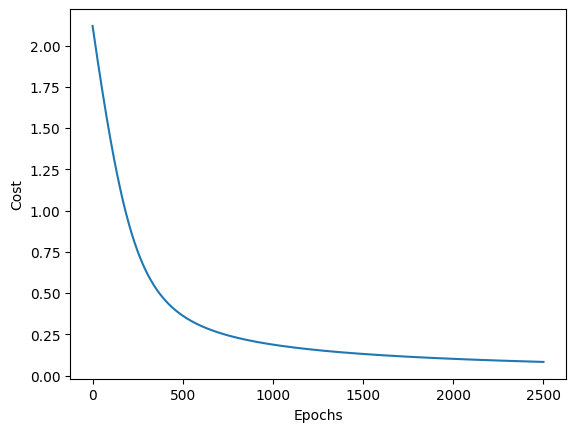

In [ ]:
# Test your model with a simple perceptron and synthetic dataset

# Example data.
np.random.seed(3) #do not change - for grading purposes
x_example_2 = np.random.randn(2, 4)
y_example_2 = np.array([0, 0, 0, 1])
y_example_2 = y_example_2.reshape(1, 4)

print ("X is of shape: ", x_example_2.shape)
print ("Y is of shape: ", y_example_2.shape)
print(x_example_2)



#Build the model as a simple perceptron (i.e. 1 output) with 2 independent variables (use shape[0]) and 4 examples
#  (use the example_2 data above)
np.random.seed(0) #do not change - for grading purposes

# Instantiate a simple perceptron.
#perceptron = None
perceptron = Model()

perceptron.build([
                  #Dense(None, None, 'None')
                  Dense(1, x_example_2.shape[0], 'sigmoid')
])

# Fit the model.  Use 2501 epochs and a learning rate of 0.0075
#costs = None
costs=perceptron.fit(x_example_2, y_example_2, epochs=2501, learning_rate=0.0075)

# Plot the costs
plot(costs)


import doctest

"""
  >>> print(np.round(costs[0], 3))
  2.119
  >>> print(np.round(costs[75], 3))
  1.585
  >>> print(np.round(costs[1025], 3))
  0.184
  >>> print(np.round(costs[1557], 3))
  0.127
  >>> print(np.round(costs[2500], 3))
  0.083
"""

doctest.testmod()

# Project 2.1a:  Logic Function Prediction

Note: You should restart the runtime and rerun the initialization steps (drive mount, imports, and function cells) the properly set up the environment before running these steps.

### Part 1: Logical AND
In this section you will test your framework using the AND logic function. Test your code using the example data in the following code cells. Complete the following steps and refer to the previous lecture units for guidance.


**Step a:**  Setup the datasets
- Run the following code cell to setup your training and test datasets.
- Print out the shapes and output data.  You should see the following outputi for the shapes: (2, 4), (1, 4), (2, 4), (1, 4), and the following for the training:   X_train:  [[0 0 1 1] [0 1 0 1]], Y_train:  [[0 0 0 1]]


In [ ]:
# Set the input data
X_train = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# Set the labels, the correct results for the AND operation
Y_train = np.array([0, 0, 0, 1])

X_test = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])
Y_test = np.array([0, 1, 0, 0])

Y_train = Y_train.reshape(1, 4)
Y_test = Y_test.reshape(1, 4)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_train)
print(Y_train)

(2, 4)
(1, 4)
(2, 4)
(1, 4)
[[0 0 1 1]
 [0 1 0 1]]
[[0 0 0 1]]


**Step b:** Create the model.
Setup a perceptron as an instance of the Model class (single node).
Recall our perceptron is simply an instance of the Dense class with 1 output unit, and a number of input units equal to the number of features in X (use the shape function on X_train as the input parameter).  Set the activation to be sigmoid.

In [ ]:
# Instantiate a simple perceptron.
#np.random.seed(0) #do not change - for grading purposes

#perceptron = None

# Build your model.
#perceptron.build([
                  #None
#])

In [ ]:
# Instantiate a simple perceptron.
np.random.seed(0) # do not change - for grading purposes

perceptron = Model()

# Build your model.
perceptron.build([
    Dense(1, X_train.shape[0], 'sigmoid')
])



**Step c:** Train the model
Fit the perceptron model to the data by calling the ‘fit’ method of the perceptron object.  Remember that ‘fit’ returns a list of costs.
Use 2501 epochs and a learning_rate of 0.0075.  Don't set anything for the verbose or callback parameters at this point.


In [ ]:
# Fit your model to the training data (remember the fit() method returns a list of costs).
# Use 2501 epochs and a learning_rate of 0.0075. Don't set anything for the verbose or callback parameters
#costs = None
costs = perceptron.fit(X_train, Y_train, epochs=2501, learning_rate=0.0075)



**Step d:** Plot and verify the costs.

Your costs plot should look like this:

<br>


![alt text](https://docs.google.com/uc?export=download&id=1hp8RjzBRMWIUgqx4H-PgWtsPZX8_caay)


Make sure your doctests run without error


[0.9092941074737066, 0.9073131596673802, 0.9053390766956841, 0.9033718478832352, 0.901411462469177, 0.899457909607788, 0.8975111783690916, 0.895571257739465, 0.8936381366222568, 0.8917118038384027, 0.8897922481270432, 0.8878794581461475, 0.8859734224731374, 0.884074129605511, 0.8821815679614746, 0.8802957258805711, 0.878416591624314, 0.8765441533768206, 0.8746783992454503, 0.8728193172614439, 0.8709668953805612, 0.8691211214837273, 0.8672819833776741, 0.8654494687955877, 0.8636235653977546, 0.8618042607722127, 0.8599915424354009, 0.858185397832812, 0.8563858143396457, 0.8545927792614646, 0.8528062798348506, 0.8510263032280622, 0.8492528365416938, 0.8474858668093357, 0.8457253809982359, 0.843971366009963, 0.8422238086810675, 0.8404826957837488, 0.838748014026519, 0.8370197500548696, 0.8352978904519388, 0.8335824217391792, 0.8318733303770252, 0.8301706027655639, 0.828474225245204, 0.8267841840973464, 0.8251004655450551, 0.8234230557537279, 0.8217519408317691, 0.8200871068312608, 0.818428

TestResults(failed=0, attempted=5)

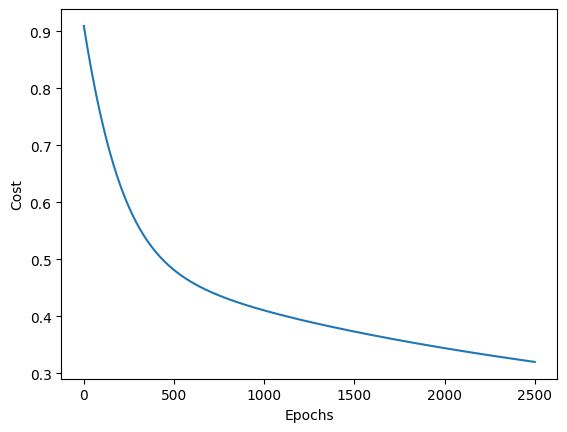

In [ ]:
# Call the plotting function.
#None

plot(costs)

print(costs)


import doctest

"""
  >>> print(np.round(costs[0], 3))
  0.909
  >>> print(np.round(costs[75], 3))
  0.779
  >>> print(np.round(costs[1025], 3))
  0.408
  >>> print(np.round(costs[1557], 3))
  0.37
  >>> print(np.round(costs[2500], 3))
  0.32
"""

doctest.testmod()

**Step e:** Make predictions on train and test sets and evaluate performance.
- Training set prediction
- Test set prediction
- Performance Evaluation for Training set
- Performance Evaluation for Test set

Make sure your doctests run without error


In [ ]:
# Make predictions on the train set.
#predictions_train = None

predictions_train = perceptron.predict(X_train)

# Make predictions on the test set.
#predictions_test = None

predictions_test = perceptron.predict(X_test)


import doctest

"""
  >>> print(predictions_train)
  [[0 0 0 1]]
  >>> print(predictions_test)
  [[0 1 0 0]]
"""

doctest.testmod()

TestResults(failed=0, attempted=2)

In [ ]:
# Evaluate performance on the train set.
#None
train_accuracy = perceptron.evaluate(predictions_train, Y_train)

import doctest

"""
  >>> print(perceptron.evaluate(predictions_train, Y_train))
  100.0
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

In [ ]:
# Evaluate performance on the test set.
#None
train_accuracy = perceptron.evaluate(predictions_train, Y_test)

import doctest
"""
  >>> print(perceptron.evaluate(predictions_test, Y_test))
  100.0
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

### Part 2: Logical OR
In this section you will test your framework using the OR logic function. Test your code using the example data in the following code cells. Complete the following steps and refer to the previous lecture units for guidance.
- Step a:  Recreate your datasets for the OR function
- Step b:  Create the model
- Step c:  Train the model
- Step d:  Plot and verify the costs
- Step e:  Make predictions on train and test sets and evaluate performance

Your costs plot should look like this:

<br>


![alt text](https://docs.google.com/uc?export=download&id=1EvBKPP7GP32MrTXs_YksKRha8uv2AOHO)


Make sure your doctests run without error




In [ ]:
# Set the input data
X_train = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# Set the labels, the correct results for the AND operation
Y_train = np.array([0, 1, 1, 1])

X_test = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])
Y_test = np.array([1, 1, 0, 1])

Y_train = Y_train.reshape(1, 4)
Y_test = Y_test.reshape(1, 4)

In [ ]:
np.random.seed(0) #do not change - for grading purposes

# Instantiate a simple perceptron.
#perceptron = None

# Build your model.
#perceptron.build([
                  #None
#])
# Instantiate a simple perceptron.

perceptron = Model()

# Build your model.
perceptron.build([
    Dense(1, X_train.shape[0], 'sigmoid')
])

In [ ]:
# Fit your model to the training data (remember the fit() method returns a list of costs).
# Use 2501 epochs and a learning_rate of 0.01. Don't set anything for the verbose or callback parameters
#costs = None
costs = perceptron.fit(X_train, Y_train, epochs=2501, learning_rate=0.01)

[0.368241735106321, 0.3680299430524974, 0.36781878726143064, 0.3676082643097524, 0.36739837079614723, 0.3671891033411918, 0.366980458587195, 0.36677243319803976, 0.36656502385902623, 0.3663582272767164, 0.3661520401787789, 0.36594645931383674, 0.3657414814513147, 0.3655371033812889, 0.3653333219143373, 0.3651301338813916, 0.3649275361335896, 0.36472552554213006, 0.3645240989981274, 0.3643232534124684, 0.3641229857156699, 0.36392329285773717, 0.36372417180802397, 0.36352561955509394, 0.36332763310658206, 0.3631302094890582, 0.3629333457478915, 0.3627370389471154, 0.36254128616929493, 0.3623460845153931, 0.3621514311046403, 0.36195732307440404, 0.36176375758005874, 0.3615707317948583, 0.36137824290980897, 0.36118628813354176, 0.36099486469218867, 0.3608039698292577, 0.36061360080550975, 0.36042375489883605, 0.3602344294041374, 0.360045621633203, 0.3598573289145919, 0.3596695485935134, 0.35948227803171084, 0.35929551460734394, 0.35910925571487334, 0.3589234987649462, 0.35873824118428194, 

TestResults(failed=0, attempted=5)

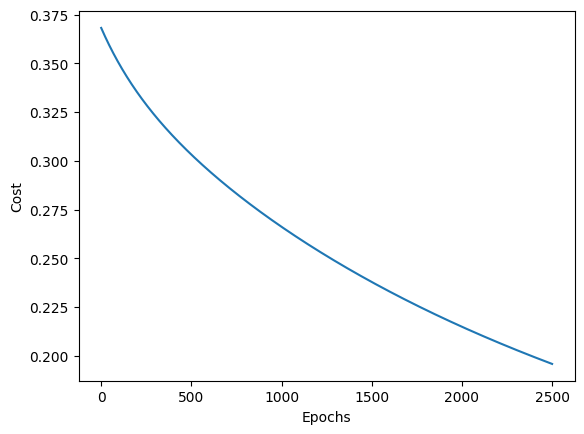

In [ ]:
# Call the plotting function.
#None
plot(costs)

print(costs)


import doctest

"""
  >>> print(np.round(costs[0], 3))
  0.368
  >>> print(np.round(costs[75], 3))
  0.354
  >>> print(np.round(costs[1025], 3))
  0.265
  >>> print(np.round(costs[1557], 3))
  0.235
  >>> print(np.round(costs[2500], 3))
  0.196
"""

doctest.testmod()

In [ ]:
# Make predictions on the train set.
#predictions_train = None

predictions_train = perceptron.predict(X_train)

# Make predictions on the test set.
#predictions_test = None

predictions_test = perceptron.predict(X_test)


import doctest

"""
  >>> print(predictions_train)
  [[0 1 1 1]]
  >>> print(predictions_test)
  [[1 1 0 1]]
"""

doctest.testmod()

TestResults(failed=0, attempted=2)

In [ ]:
# Evaluate performance on the train set.
#None

train_accuracy = perceptron.evaluate(predictions_train, Y_train)

import doctest

"""
  >>> print(perceptron.evaluate(predictions_train, Y_train))
  100.0
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

In [ ]:
# Evaluate performance on the test set.
#None

test_accuracy = perceptron.evaluate(predictions_test, Y_test)

import doctest

"""
  >>> print(perceptron.evaluate(predictions_test, Y_test))
  100.0
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

### Part 3: Logical XOR
In this section you will test your framework using the exclusive-or (XOR) logic function. Test your code using the example data in the following code cells.  You will first recreate the steps in the previous subsections using a single node perceptron model, then will repeat the steps using a multi-layer perceptron model.   Complete the following steps and refer to the previous lecture units for guidance.
- Step a:  Recreate your datasets for the XOR function
- Step b:  Create the model
- Step c:  Train the model
- Step d:  Plot and verify the costs
- Step e:  Make predictions on train and test sets and evaluate performance


Your costs plot for the simple Perceptron model should look like this:

<br>


![alt text](https://docs.google.com/uc?export=download&id=1ksrc4rG-JrhIEN_B3eCxByfuUlGbEVUU)


<br>

Your costs for the MultiLayer Perceptron model should look like this:

<br>

![alt text](https://docs.google.com/uc?export=download&id=1KOftXWKIty0BrkSWnBg6Jl8QOkbxeqHO)


Make sure your doctests run without errors.

<br>

WHEN YOU COMPLETE THIS SECTION - STOP, AND UPLOAD YOUR COLAB SCRIPT FOR THIS ASSIGNMENT. THE OTHER PARTS IN THE COLAB SCRIPT WILL BE FOR SUBSEQUENT PROJECT/ASSIGNMENTS

#### 3a: Perceptron Model


In [ ]:
# Set the input data
X_train = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# Set the labels, the correct results for the xor operation
Y_train = np.array([0, 1, 1, 0])

X_test = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])
Y_test = np.array([1, 0, 0, 1])

Y_train = Y_train.reshape(1, 4)
Y_test = Y_test.reshape(1, 4)

In [ ]:
# Instantiate a simple perceptron.
np.random.seed(0) #do not change - for grading purposes

#perceptron = None

# Build your model.
#perceptron.build([
                  #None
#])

perceptron = Model()

# Build your model.
perceptron.build([
    Dense(1, X_train.shape[0], 'sigmoid')
])

In [ ]:
# Fit your model to the training data (remember the fit() method returns a list of costs).
# Use 2501 epochs and a learning_rate of 0.0075. Don't set anything for the verbose or callback parameters

#costs = None

costs = perceptron.fit(X_train, Y_train, epochs=2501, learning_rate=0.0075)

[0.9092941022078551, 0.908577117663855, 0.9078624884872214, 0.9071502099891129, 0.9064402774713858, 0.9057326862267022, 0.905027431538636, 0.9043245086817793, 0.9036239129218524, 0.9029256395158053, 0.9022296837119299, 0.9015360407499637, 0.9008447058611972, 0.900155674268581, 0.8994689411868333, 0.8987845018225444, 0.8981023513742857, 0.8974224850327148, 0.8967448979806825, 0.8960695853933398, 0.895396542438244, 0.8947257642754645, 0.8940572460576903, 0.8933909829303344, 0.8927269700316431, 0.8920652024927995, 0.8914056754380291, 0.8907483839847077, 0.8900933232434675, 0.8894404883183005, 0.888789874306666, 0.8881414762995963, 0.8874952893817998, 0.88685130863177, 0.8862095291218887, 0.8855699459185306, 0.8849325540821691, 0.8842973486674826, 0.883664324723456, 0.8830334772934888, 0.8824048014154975, 0.8817782921220205, 0.8811539444403225, 0.8805317533924994, 0.8799117139955801, 0.8792938212616328, 0.8786780701978674, 0.8780644558067388, 0.8774529730860501, 0.876843617029058, 0.876236

TestResults(failed=0, attempted=5)

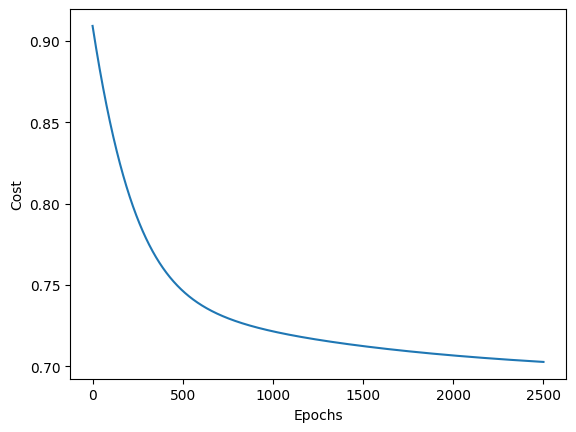

In [ ]:
# Call the plotting function.
#None
plot(costs)
print(costs)


import doctest

"""
  >>> print(np.round(costs[0], 3))
  0.909
  >>> print(np.round(costs[75], 3))
  0.862
  >>> print(np.round(costs[1025], 3))
  0.721
  >>> print(np.round(costs[1557], 3))
  0.712
  >>> print(np.round(costs[2500], 3))
  0.703
"""

doctest.testmod()

In [ ]:
# Make predictions on the train set.
#predictions_train = None

predictions_train = perceptron.predict(X_train)

# Make predictions on the test set.
#predictions_test = None

predictions_test = perceptron.predict(X_test)

import doctest

"""
  >>> print(predictions_train)
  [[0 0 1 1]]
  >>> print(predictions_test)
  [[1 1 0 0]]
"""

doctest.testmod()

TestResults(failed=0, attempted=2)

In [ ]:
# Evaluate performance on the train set.
#None

train_accuracy = perceptron.evaluate(predictions_train, Y_train)

import doctest

"""
  >>> print(perceptron.evaluate(predictions_train, Y_train))
  50.0
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

In [ ]:
# Evaluate performance on the test set.
#None

test_accuracy = perceptron.evaluate(predictions_test, Y_test)

import doctest

"""
  >>> print(perceptron.evaluate(predictions_test, Y_test))
  50.0
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

#### 3b: Multi-Layer Model


In [ ]:
# Instantiate a MultiLayer perceptron.

l_layer = Model()

# Build your model.
# Set up 3 Dense objects with input layer set to 2 features and 4 examples
# corresponding to the function truth table, 1 hidden layer with 2 nodes,
# and output layer with 1 node. Set the output layer activation to
# sigmoid and the other layers to relu.
np.random.seed(0) #do not change - for grading purposes
#L1 = None


L1 = Dense(output_units=2, input_units=2, activation='relu')

np.random.seed(0) #do not change - for grading purposes
#L2 = None

L2 = Dense(output_units=2, input_units=2, activation='relu')

np.random.seed(0) #do not change - for grading purposes
#Lout = None

Lout = Dense(output_units=1, input_units=2, activation='sigmoid')

#Build your model with L1, L2, and Lout
#l_layer.build([
               #None,
               #None,
               #None
#])



l_layer.build([
    L1,
    L2,
    Lout
])


In [ ]:
# Fit your model to the training data (remember the fit() method returns a list of costs).
# Use 2501 epochs and a learning_rate of 0.0075. Don't set anything for the verbose or callback parameters

costs = l_layer.fit(X_train, Y_train, 2501, 0.0075)


In [ ]:
#Confirm the weights and biases after training

import doctest

"""
  >>> print(np.round(L1.getWeights()[0][0], 3))
  1.156
  >>> print(np.round(L1.getWeights()[1][1], 3))
  1.568
  >>> print(np.round(L1.getBiases()[1][0], 3))
  -1.545
"""

doctest.testmod()

TestResults(failed=0, attempted=3)

TestResults(failed=0, attempted=5)

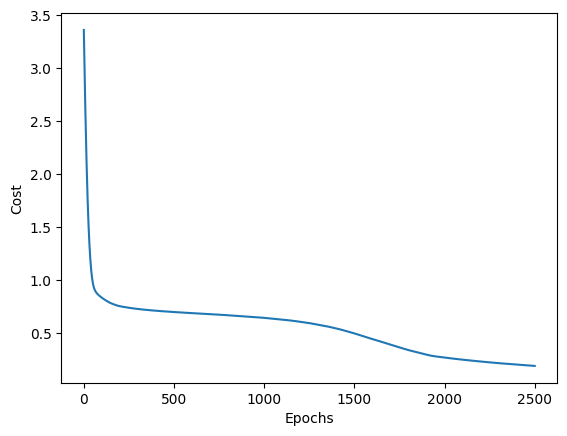

In [ ]:
# Call the plotting function.
#None
plot(costs)

import doctest

"""
  >>> print(np.round(costs[0], 3))
  3.36
  >>> print(np.round(costs[75], 3))
  0.868
  >>> print(np.round(costs[1025], 3))
  0.638
  >>> print(np.round(costs[1557], 3))
  0.463
  >>> print(np.round(costs[2500], 3))
  0.187
"""

doctest.testmod()

In [ ]:
# Make predictions on the train set.
#predictions_train = None

predictions_train = l_layer.predict(X_train)

# Make predictions on the test set.
#predictions_test = None

predictions_test = l_layer.predict(X_test)

import doctest

"""
  >>> print(predictions_train)
  [[0 1 1 0]]
  >>> print(predictions_test)
  [[1 0 0 1]]
"""

doctest.testmod()

TestResults(failed=0, attempted=2)

In [ ]:
# Evaluate performance on the train set.
#None

train_accuracy = l_layer.evaluate(predictions_train, Y_train)


import doctest

"""
  >>> print(l_layer.evaluate(predictions_train, Y_train))
  100.0
"""

doctest.testmod()


TestResults(failed=0, attempted=1)

In [ ]:
# Evaluate performance on the test set.
#None

test_accuracy = l_layer.evaluate(predictions_test, Y_test)

import doctest

"""
  >>> print(l_layer.evaluate(predictions_test, Y_test))
  100.0
"""

doctest.testmod()


TestResults(failed=0, attempted=1)

#Project 2.2b:  Binary Image Classification

Note: You should restart the runtime and rerun the initialization steps (drive mount, imports, and function cells) the properly set up the environment before running these steps.

In this project you will use your framework to classify image data as either a cat or non-cat image.
You will build, train, and evaluate the performance of a simple Perceptron, then extend it to a MultiLayer Perceptron.
Record and report the following performance parameters.
- Speed of model convergence, i.e. the number of epochs required to achieve an acceptable loss (costs). Use < 0.2 as an acceptable loss metric.
- Train and test performance.  Reflect on this result.  What do the performance metrics imply for your model?

### Part 1: Simple Perceptron Model
In this section you will test your framework to classify real image data using a simple perceptron model. Test your code using the example data in the following code cells. Complete the following steps and refer to the previous lecture units for guidance.

<br>

Your costs plot should like this this:

<br>

![alt text](https://docs.google.com/uc?export=download&id=1cikFPozNOf6gQOcmeuB_cA0rb8IfUCCV)



**Step a:**  Setup the datasets
- Run the following code cell to setup your training and test datasets.
- Use the load_h5py_data method to load the complete dataset.  The function also allows you to index one of the images and display the output on your console.
- Print out the shapes using the see_shapes() method.  You should see the following output for the shapes:
  - Number of training examples: m_train =  209
  - Number of testing examples: m_test =  50
  - X_train shape:  (209, 64, 64, 3)
  - Y_train shape:  (1, 209)
  - X_test shape:  (50, 64, 64, 3)
  - Y_test shape:  (1, 50)
- Flatten your images using the flatten() method, and print out the shapes of the flattened images.  You should see the following output:
  - Flattened X_train shape: (12288, 209)
  - Y_train shape: (1, 209)
  - Flattened X_test shape: (12288, 50)
  - Y_test shape: (1, 50)
- Normalize the image data using the normalize() method

y = 0. It's a non-cat picture.


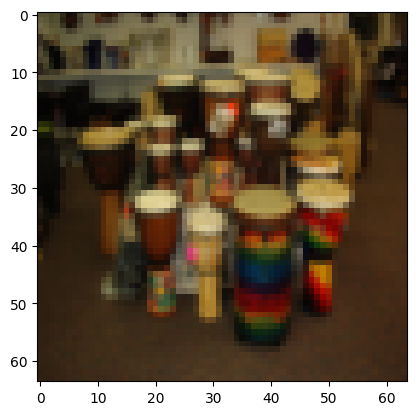

In [ ]:
 # Load image data.
X_train, Y_train, X_test, Y_test = load_h5py_data(5, show_example=True)

In [ ]:
# Call the see_shapes() function.
see_shapes(X_train, Y_train, X_test, Y_test)

Number of training examples: m_train =  209
Number of testing examples: m_test =  1
X_train shape:  (209, 64, 64, 3)
Y_train shape:  (50, 64, 64, 3)
X_test shape:  (1, 209)
Y_test shape:  (1, 50)


In [ ]:
# Call the flatten() function.
X_train, X_test = flatten(X_train, Y_train, X_test, Y_test)

Flattened X_train shape: (12288, 209)
Y_train shape: (50, 64, 64, 3)
Flattened X_test shape: (209, 1)
Y_test shape: (1, 50)


In [ ]:
# Call the normalize() function.
X_train, X_test = normalize(X_train, X_test)

**Step b:**  Create a simple perceptron model
Setup 1 Dense layer consisting of a single instance of the Dense class with 1 output unit, and a number of input units equal to the number of features in X.
Set the activation function to sigmoid.

In [ ]:
### BEGIN CODE HERE

# Instantiate a simple perceptron.
#perceptron = None


perceptron = Model()


np.random.seed(3) #do not change for grading purposes

# Build your model.
#perceptron.build([
                  #None
#])

# Build your model.
perceptron.build([
    Dense(1, X_train.shape[0], 'sigmoid')
])


### END CODE HERE

**Step c:**  Train the model using the fit() method
Use 2501 epochs and a learning_rate of 0.0075.
Don’t worry about passing anything for verbose or callback.


In [ ]:
### BEGIN CODE HERE

# Fit your model to the training data (remember the fit() method returns a list of costs).
# Use 2501 epochs and a learning_rate of 0.0075. Don’t pass anything for verbose or callback.
#costs = None

costs = perceptron.fit(X_train, Y_train, epochs=2501, learning_rate=0.0075)

### END CODE HERE

**Step d:**  Plot the costs
Make sure your doctests pass without errors.

[0.7403170987355262, 1.0312739722411124, 1.8342443327115292, 0.687152061157775, 0.9216038762537097, 1.2636507518053361, 2.047508963701537, 0.6197120395388964, 0.6154556605966885, 0.611764182056409, 0.6103169239912203, 0.6225895240169638, 0.7217550909841987, 1.071201364588601, 1.8701815007038147, 0.611469737484191, 0.7208212116366495, 1.0759952514818825, 1.8612818871944825, 0.5982715243581056, 0.6992531425318675, 1.0381855423024393, 1.8101972226927132, 0.5988593728855004, 0.7492960442708518, 1.1118387917327042, 1.861051317594253, 0.5717041226310301, 0.6390561693932442, 0.907933426050463, 1.628463272444185, 0.6509851790020956, 1.031953222931327, 1.084827497418095, 1.808185166100329, 0.5612460374859453, 0.6567222852844364, 0.9592684528534946, 1.674089598543698, 0.5979677543560042, 0.8585967785037895, 1.1043848227924067, 1.791340647557954, 0.5445527416252262, 0.6291767148124673, 0.903066606735924, 1.583519684962659, 0.6173492420428073, 0.9617761781272046, 1.0402799517255108, 1.713319880838

TestResults(failed=0, attempted=5)

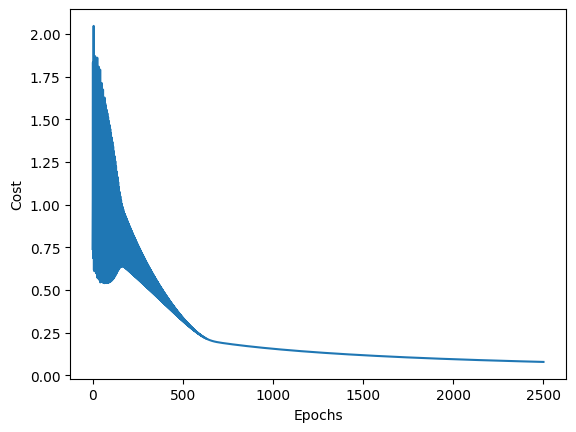

In [ ]:
### BEGIN CODE HERE

# Call the plotting function.
#None

plot(costs)
print(costs)
### END CODE HERE

import doctest

"""
  >>> print(np.round(costs[0], 3))
  0.74
  >>> print(np.round(costs[75], 3))
  0.541
  >>> print(np.round(costs[1025], 3))
  0.153
  >>> print(np.round(costs[1557], 3))
  0.114
  >>> print(np.round(costs[2500], 3))
  0.078
"""

doctest.testmod()


**Step e:**  Make predictions on training and test datasets, using the perceptron’s “predict” method.
Make sure your doctests pass without errors.


In [ ]:
### BEGIN CODE HERE


# Make predictions on the train set.

predictions_train=perceptron.predict(X_train)


# Make predictions on the test set.

#predictions_test = perceptron.predict(X_test)

### END CODE HERE


import doctest

"""
  >>> print(predictions_train[0][17])
  0
  >>> print(predictions_train[0][50])
  1
  >>> print(predictions_test[0][15])
  1
  >>> print(predictions_test[0][6])
  0
"""

doctest.testmod()

**********************************************************************
File "__main__", line 7, in __main__
Failed example:
    print(predictions_test[0][15])
Exception raised:
    Traceback (most recent call last):
      File "/usr/lib/python3.10/doctest.py", line 1350, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest __main__[2]>", line 1, in <module>
        print(predictions_test[0][15])
    IndexError: index 15 is out of bounds for axis 0 with size 4
**********************************************************************
File "__main__", line 9, in __main__
Failed example:
    print(predictions_test[0][6])
Exception raised:
    Traceback (most recent call last):
      File "/usr/lib/python3.10/doctest.py", line 1350, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest __main__[3]>", line 1, in <module>
        print(predictions_test[0][6])
    IndexError: index 6 is out of bounds for axis 0 with size 4
*******

TestResults(failed=2, attempted=4)

**Step f:** Evaluate performance of the training and test datasets
Make sure your doctests pass without errors.


In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the train set.
perceptron.evaluate(predictions_train, Y_train)

### END CODE HERE


import doctest

"""
  >>> print(np.round(perceptron.evaluate(predictions_train, Y_train), 3))
  99.522
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the test set.
#perceptron.evaluate(predictions_test, Y_test)

### END CODE HERE


import doctest

"""
  >>> print(np.round(perceptron.evaluate(predictions_test, Y_test), 3))
  66.0
"""

doctest.testmod()

**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(np.round(perceptron.evaluate(predictions_test, Y_test), 3))
Exception raised:
    Traceback (most recent call last):
      File "/usr/lib/python3.10/doctest.py", line 1350, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest __main__[0]>", line 1, in <module>
        print(np.round(perceptron.evaluate(predictions_test, Y_test), 3))
      File "<ipython-input-17-1aea43b589c8>", line 58, in evaluate
        accuracy = 100 - np.mean(np.abs(predictions - Y)) * 100
    ValueError: operands could not be broadcast together with shapes (1,4) (1,50) 
**********************************************************************
1 items had failures:
   1 of   1 in __main__
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=1)

### Part 2: Two-layer Model
In this section you will test your framework to classify real image data using a multi-layer model, we'll start with 2 layers. Test your code using the example data in the following code cells. Complete the following steps and refer to the previous lecture units for guidance.


**Note**, you will need to reload the images and rerun the preprocessing steps when switching the model.


<br>

Your costs plot should like this this:

<br>

![alt text](https://docs.google.com/uc?export=download&id=1LvxtdMkJnpEadJw1I2i8axxUuikXlxj4)


**Step a:**  Create a two-layer model
Setup 2 Dense layers.  When building the network, use a hidden layer (ie the first layer) with 7 output units, a number of input units equal to the number of features in X, and a relu activation function.
Use a simple perceptron as your output layer.  Remember to set the input units for the output layer equal to the output units of the first layer, and use a sigmoid activation function in the output layer.


In [ ]:
### BEGIN CODE HERE

# Instantiate your model.
two_layer = Model()

L1 = Dense(output_units=7, input_units=X_train.shape[0], activation='relu')

Lout = Dense(output_units=1, input_units=7, activation='sigmoid')



np.random.seed(5)  #do not change for grading purposes

# Build a model with one hidden layer.
two_layer.build([
               L1,
               Lout
])

### END CODE HERE



**Step b:**  Train the model
Call the “fit” method, and use the same number of epochs and learning rate  as with the simple perceptron model to get a list of costs, then plot them to visualize training.
Make sure your doctests pass without errors.

In [ ]:
### BEGIN CODE HERE

# Fit your model to the training data.
# Use 2501 epochs and a learning_rate of 0.0075. Don’t pass anything for verbose or callback.

costs = two_layer.fit(X_train, Y_train, epochs=2501, learning_rate=0.0075)

### END CODE HERE

**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(np.round(costs[0], 3))
Expected:
    0.958
Got:
    0.721
**********************************************************************
File "__main__", line 5, in __main__
Failed example:
    print(np.round(costs[75], 3))
Expected:
    0.543
Got:
    0.541
**********************************************************************
File "__main__", line 7, in __main__
Failed example:
    print(np.round(costs[1025], 3))
Expected:
    0.137
Got:
    0.083
**********************************************************************
File "__main__", line 9, in __main__
Failed example:
    print(np.round(costs[1557], 3))
Expected:
    0.048
Got:
    0.038
**********************************************************************
File "__main__", line 11, in __main__
Failed example:
    print(np.round(costs[2500], 3))
Expected:
    0.021
Got:
    0.017
*****************************

TestResults(failed=5, attempted=5)

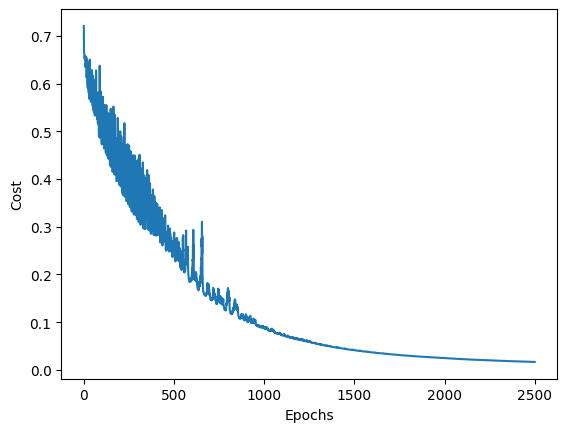

In [ ]:
### BEGIN CODE HERE

# Plot the costs.

plot(costs)

### END CODE HERE


import doctest

"""
  >>> print(np.round(costs[0], 3))
  0.958
  >>> print(np.round(costs[75], 3))
  0.543
  >>> print(np.round(costs[1025], 3))
  0.137
  >>> print(np.round(costs[1557], 3))
  0.048
  >>> print(np.round(costs[2500], 3))
  0.021
"""

doctest.testmod()

**Step c:** Evaluate performance of the training and test datasets
Make sure your doctests pass without errors.


In [ ]:
### BEGIN CODE HERE

# Make predictions on the train set.
predictions_train = two_layer.predict(X_train)

# Make predictions on the test set.
#predictions_test = two_layer.predict(X_test)

### END CODE HERE


import doctest

"""
  >>> print(predictions_train[0][17])
  0
  >>> print(predictions_train[0][50])
  1
  >>> print(predictions_test[0][15])
  1
  >>> print(predictions_test[0][6])
  0
"""

doctest.testmod()

**********************************************************************
File "__main__", line 7, in __main__
Failed example:
    print(predictions_test[0][15])
Exception raised:
    Traceback (most recent call last):
      File "/usr/lib/python3.10/doctest.py", line 1350, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest __main__[2]>", line 1, in <module>
        print(predictions_test[0][15])
    IndexError: index 15 is out of bounds for axis 0 with size 4
**********************************************************************
File "__main__", line 9, in __main__
Failed example:
    print(predictions_test[0][6])
Exception raised:
    Traceback (most recent call last):
      File "/usr/lib/python3.10/doctest.py", line 1350, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest __main__[3]>", line 1, in <module>
        print(predictions_test[0][6])
    IndexError: index 6 is out of bounds for axis 0 with size 4
*******

TestResults(failed=2, attempted=4)

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the train set.

train_accuracy = two_layer.evaluate(predictions_train, Y_train)

### END CODE HERE


import doctest

"""
  >>> print(np.round(two_layer.evaluate(predictions_train, Y_train), 3))
  99.522
"""

doctest.testmod()

**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(np.round(two_layer.evaluate(predictions_train, Y_train), 3))
Expected:
    99.522
Got:
    100.0
**********************************************************************
1 items had failures:
   1 of   1 in __main__
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=1)

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the test set.

#test_accuracy = two_layer.evaluate(predictions_test, Y_test)

### END CODE HERE


import doctest

"""
  >>> print(np.round(two_layer.evaluate(predictions_test, Y_test), 3))
  76.0
"""

doctest.testmod()

**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(np.round(two_layer.evaluate(predictions_test, Y_test), 3))
Exception raised:
    Traceback (most recent call last):
      File "/usr/lib/python3.10/doctest.py", line 1350, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest __main__[0]>", line 1, in <module>
        print(np.round(two_layer.evaluate(predictions_test, Y_test), 3))
      File "<ipython-input-17-1aea43b589c8>", line 58, in evaluate
        accuracy = 100 - np.mean(np.abs(predictions - Y)) * 100
    ValueError: operands could not be broadcast together with shapes (1,4) (1,50) 
**********************************************************************
1 items had failures:
   1 of   1 in __main__
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=1)

### Part 3: L-layer (multi-layer) Model
In this section you will experiment and test your framework to classify real image data using a multi-layer model.  Test your code using the example data in the following code cells. Complete the following steps and refer to the previous lecture units for guidance.
Try different 'hyperparameter' configurations, i.e. a different number of layers and nodes per layer. Your final configuration show optimize the train and test performance without having too large of a network (try to avoid having too many nodes or too many layers as this could result in overfitting).
Your final network configuration should converge to below 0.1 in around 1000 epochs, and have a training score above 95% and a test score of at least 80%.
Hints:
- The performance requirement is attainable with a 4-layer network, i.e. 3 hidden layers and 1 output layer (the input nodes do not count as a layer).
- Use Sigmoid activation for the output layer, and ReLu for all other layers.

**Note**, you will need to reload the images and rerun the preprocessing steps when switching the model.

Reflect on your model and its performance.  What were your hyperparameters set to, i.e. the number of layers, and number of nodes per layer?  What was the model train and test performance?

**Step a:**  Create your MultiLayer Perceptron model


In [ ]:
# Instantiate your model.
l_layer = Model()

np.random.seed(3)  #do not change for grading purposes



L1 = Dense(output_units=20, input_units=X_train.shape[0], activation='relu')

np.random.seed(0)


L2 = Dense(output_units=20, input_units=20, activation='relu')

np.random.seed(0)

L3 = Dense(output_units=20, input_units=20, activation='relu')

np.random.seed(0)


L4 = Dense(output_units=20, input_units=20, activation='relu')

np.random.seed(0)

L5 = Dense(output_units=20, input_units=20, activation='relu')

np.random.seed(0)

Lout = Dense(output_units=1, input_units=20, activation='sigmoid')



# Build a deep neural network.
l_layer.build([
    L1,L2,L3,L4,L5,Lout
])



**Step b:**  Train the model
Call the “fit” method, and use the same number of epochs and learning rate  as with the simple perceptron model to get a list of costs, then plot them to visualize training.

WHEN YOU COMPLETE THIS SECTION - STOP, AND UPLOAD YOUR COLAB SCRIPT FOR THIS ASSIGNMENT. THE OTHER PARTS IN THE COLAB SCRIPT WILL BE FOR SUBSEQUENT PROJECT/ASSIGNMENTS

In [ ]:
# Fit your model to the training data.
# Use 2501 epochs and a learning_rate of 0.0075. Don’t pass anything for verbose or callback.

costs = l_layer.fit(X_train, Y_train, epochs=2501, learning_rate=0.0075)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

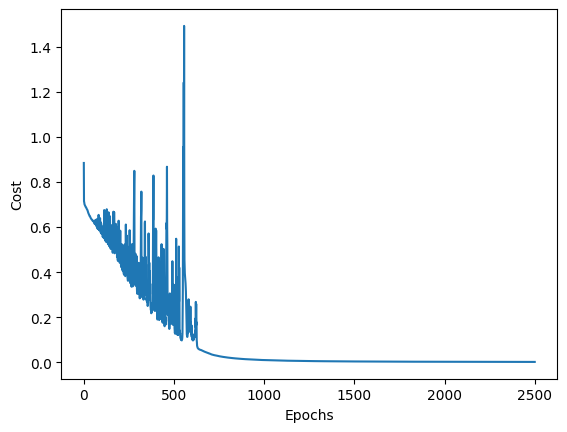

In [ ]:
# Plot the costs.

plot(costs)


In [ ]:
# Make predictions on the train set.
predictions_train = l_layer.predict(X_train)

# Make predictions on the test set.
#predictions_test = l_layer.predict(X_test)


In [ ]:
# Evaluate performance on the train set.
train_accuracy = two_layer.evaluate(predictions_train, Y_train)
print(train_accuracy)

100.0


In [ ]:
# Evaluate performance on the test set.
#test_accuracy = two_layer.evaluate(predictions_test, Y_test)


# Project 2.2a:  Binary Classification on Planar Data

In this project, we’ll continue the use of the multi-layer perceptron framework you created to perform a more complex classification task.

In this section, we'll show how you can generalize the framework and apply it to binary classification on planar data.  This task will demonstrate the capabilities of your framework to classify data with non-linear decision boundaries similar to what was seen with the XOR gate.

<br>

**Note:** You should restart the runtime and rerun the initialization steps (drive mount, imports, and function cells) to properly set up the environment before running these steps.


**Part A:**  Data set up.

Run the following code cells to create the dataset and make_plot function, then call make_plot() with a suitable title to plot it.  The dataset is generated using the sklearn make_moons function.

You should see a distribution of points in a plane.
The points are either red or blue, and you will be building a model to define a decision boundary which separates the points based on color.
Run the "Reshaping" cell then call see_shapes() to see more information about your data.  You should see the following shapes:
- Number of training examples: m_train =  2
- Number of testing examples: m_test =  2
- X_train shape:  (2, 900)
- Y_train shape:  (1, 900)
- X_test shape:  (2, 100)
- Y_test shape:  (1, 100)

Each example has two features (that is, the x and y coordinates in the plane) and one label (that is,  the color of the point).

<br>

[Credit for visualizations](https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795)




In [ ]:
sns.set_style("whitegrid")

In [ ]:
# number of samples in the data set
N_SAMPLES = 1000

X, Y = make_moons(n_samples = N_SAMPLES, noise=0.2, random_state=100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
# The plot function making up the graph of a dataset
def make_plot(X, y, plot_name, file_name=None, XX=None, YY=None, preds=None, dark=False):
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(16,12))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 1, cmap=cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    if(file_name):
        plt.savefig(file_name)
        plt.close()

In [ ]:
# boundary of the graph
GRID_X_START = -1.5
GRID_X_END = 2.5
GRID_Y_START = -1.0
GRID_Y_END = 2

In [ ]:
# Create grid.
grid = np.mgrid[GRID_X_START:GRID_X_END:100j,GRID_X_START:GRID_Y_END:100j]
grid_2d = grid.reshape(2, -1).T
XX, YY = grid

Plot your dataset.
Your plot should look like this:


![alt text](https://docs.google.com/uc?export=download&id=1ZKt-ju3qJBFV-nd9FJwJ7Rom4GW7Qd0U)


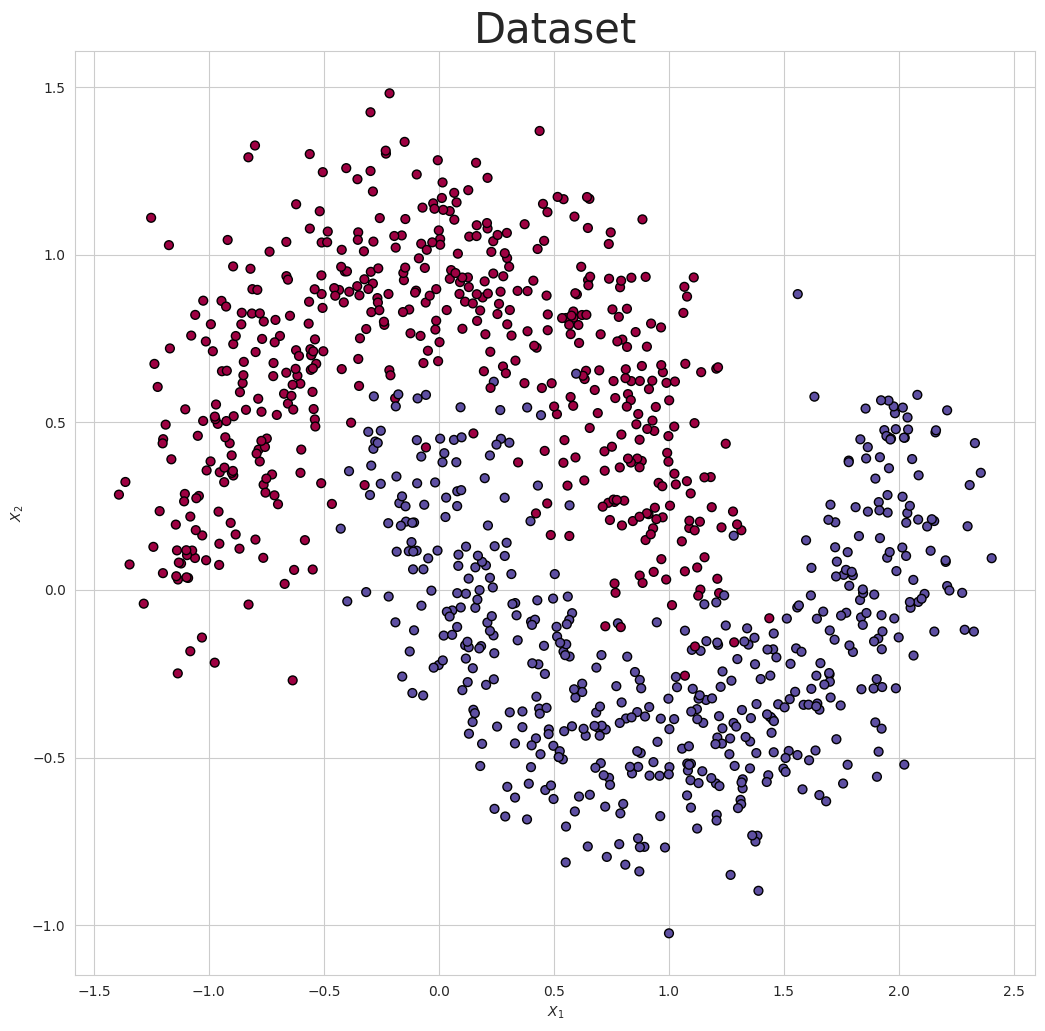

In [ ]:
# Call make_plot (pass X, Y, and the name of the plot only).
make_plot(X, Y, "Dataset")


In [ ]:
# Reshaping.
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.reshape(1, Y_train.shape[0])
Y_test = Y_test.reshape(1, Y_test.shape[0])

In [ ]:
# Call see_shapes().
see_shapes(X_train, X_test, Y_train, Y_test)


Number of training examples: m_train =  2
Number of testing examples: m_test =  2
X_train shape:  (2, 900)
Y_train shape:  (1, 900)
X_test shape:  (2, 100)
Y_test shape:  (1, 100)


In [ ]:
X_train.shape[0]

2

### Part 1:  Simple Perceptron Model

First we'll see how well a simple perceptron can do.
Instantiate your “planar perceptron” model as a simple perceptron.
This should be the same as the perceptron you made previously, but it's important that we create a new object as we need to rebuild the model to have the right input shape and reinitialized parameters.
Follow the same procedure as you did in the previous project to build your model and fit it to the data.  Use 10,000 epochs and a learning rate of 0.01.
Plot your costs and make predictions on the train and test sets, then evaluate performance.
You should see that a simple perceptron classifies the data with around 87% accuracy at test time.
The final cell in the simple perceptron section plots the decision boundary as decided by the model post-training, and saves it as a png file.  Note that you can simply plot the output to the console by omitting the “file name” parameter.
If you’ve defined a file name, run the cell then find the file in the file system of your colab notebook, and double click it to view in a scratch cell.
As we discussed in a previous unit in this course and previous project in this script, you should see that the perceptron model gives a linear decision boundary (that is a straight line boundary).  However, note that since our dataset is not linearly separable, this isn’t good enough.

**Step a:** Create a simple perceptron model
Setup 1 Dense layer consisting of a single instance of the Dense class with 1 output unit, and a number of input units equal to the number of features in X.
Set the activation function to sigmoid.

In [ ]:
# Instantiate your model.
np.random.seed(0) #do not change - for grading purposes

#planar_perceptron = None

planar_perceptron = Model()

# Build a simple perceptron model.
# Setup 1 Dense layer consisting of a single instance of the Dense class
# with 1 output unit, and a number of input units equal to the
# number of features in X. Set the activation function to sigmoid.
#planar_perceptron.build([
                         #None

#])


single_layer = Dense(output_units=1, input_units=X.shape[1], activation='sigmoid')


planar_perceptron.build([single_layer])

**Step b:** Train the model using the fit() method.
Use 10000 epochs and a learning_rate of 0.01.
Don’t worry about passing anything for verbose or callback.

In [ ]:
# Fit your model to the training data.
# Use 10000 epochs and a learning_rate of 0.01. Don’t pass anything for verbose or callback.
#costs = None

costs = planar_perceptron.fit(X_train, Y_train, 10000, 0.01)

**Step c:** Plot the costs.
Make sure your doctests pass without errors.
Note, the plot() method was written in the Model Class section.

Your costs plot should look like this:

<br>

![alt text](https://docs.google.com/uc?export=download&id=1ORSa9MM8xIVQl68Zl-oLwnUDbfE1e3qE)


Make sure your doctests run without error


TestResults(failed=0, attempted=8)

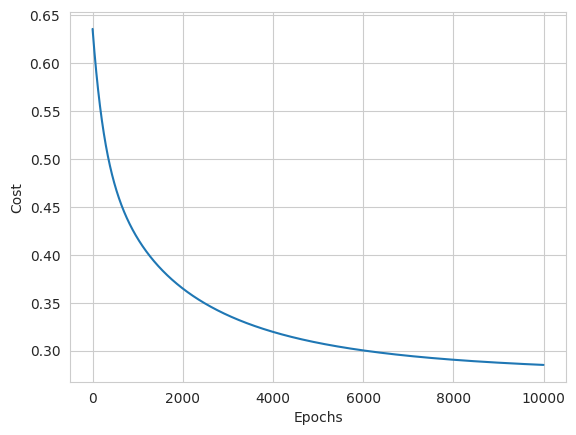

In [ ]:
# Plot the costs.
#None

plot(costs)

import doctest

"""
  >>> print(np.round(costs[0], 3))
  0.636
  >>> print(np.round(costs[75], 3))
  0.594
  >>> print(np.round(costs[1025], 3))
  0.415
  >>> print(np.round(costs[1557], 3))
  0.383
  >>> print(np.round(costs[2500], 3))
  0.349
  >>> print(np.round(costs[5000], 3))
  0.308
  >>> print(np.round(costs[7500], 3))
  0.292
  >>> print(np.round(costs[9999], 3))
  0.285
"""

doctest.testmod()

**Step d:**  Make predictions on train and test sets and evaluate performance.
Make sure your doctests pass without errors.

In [ ]:
# Make predictions on the train set.
#predictions_train = None


predictions_train = planar_perceptron.predict(X_train)
# Make predictions on the test set.
#predictions_test = None

predictions_test = planar_perceptron.predict(X_test)

import doctest

"""
  >>> print(predictions_train[0][17])
  0
  >>> print(predictions_train[0][50])
  1
  >>> print(predictions_test[0][15])
  1
  >>> print(predictions_test[0][6])
  0
"""

doctest.testmod()

TestResults(failed=0, attempted=4)

In [ ]:
# Evaluate performance on the train set.
#None

train_accuracy = planar_perceptron.evaluate(predictions_train, Y_train)


import doctest

"""
  >>> print(np.round(planar_perceptron.evaluate(predictions_train, Y_train), 3))
  87.444
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

In [ ]:
# Evaluate performance on the test set.
#None

test_accuracy = planar_perceptron.evaluate(predictions_test, Y_test)

import doctest

"""
  >>> print(np.round(planar_perceptron.evaluate(predictions_test, Y_test), 3))
  83.0
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

**Step e:** Plot the dataset along with the predicted outputs and decision boundary.

Your classification and decision boundary plot should look like this:

<br>

![alt text](https://docs.google.com/uc?export=download&id=1Tz6QCMqrwoIz6kjkcbK-9E3NHHbAz2vQ)

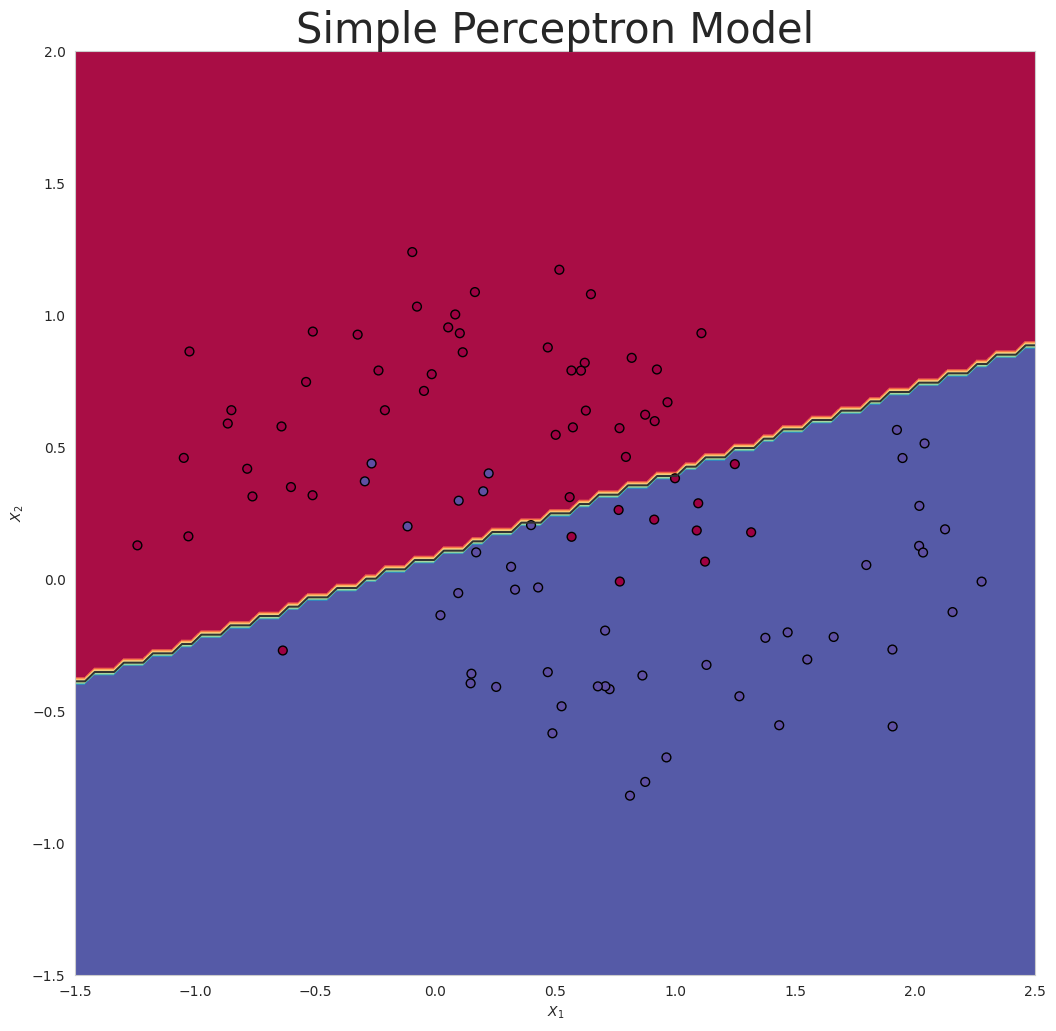

In [ ]:
preds = planar_perceptron.predict(np.transpose(grid_2d))
preds = preds.reshape(preds.shape[1], 1)
X_plt = X_test.T
Y_plt = Y_test.T

# Plot decision boundary.
# If a filename is specified, a png file of the plot will be written to your current working directory
#   otherwise the plot will be displayed in the console.
#make_plot(X_plt, Y_plt, 'Simple Perceptron Model', file_name='Simple Perceptron.png', XX=XX, YY=YY, preds=preds)
make_plot(X_plt, Y_plt, 'Simple Perceptron Model', XX=XX, YY=YY, preds=preds)


### Part 2: L-layer (multi-layer) Model
In this section you will experiment and test your framework to classify planar data using a multi-layer model. Test your code using the example data in the following code cells. Complete the following steps and refer to the previous lecture units for guidance. Try different 'hyperparameter' configurations, i.e. a different number of layers and nodes per layer. Your final configuration show optimize the train and test performance without having too large of a network (try to avoid having too many nodes or too many layers as this could result in overfitting).

Your final network configuration should converge to below 0.1 in around 5000 epochs, and have both training and test scores above 95%.
Hints:

The performance requirement is attainable with a 5-layer network, i.e. 4 hidden layers and 1 output layer (the input nodes do not count as a layer).
Use Sigmoid activation for the output layer, and ReLu for all other layers.

Reflect on your model and its performance. What were your hyperparameters set to, i.e. the number of layers, and number of nodes per layer? What was the model train and test performance?


**Note**, you will need to reload the dataset and rerun the preprocessing steps when switching the model.





**Step a:** Create a MultiLayer perceptron model
Setup an L Dense layer with the number of input units equal to the number of features in X.
Set the output activation function to sigmoid, and the other layers to ReLu.

In [ ]:
np.random.seed(0) #do not change - for grading purposes

# Instantiate your model.
planar_net = Model()

L1 = Dense(output_units=20, input_units=X.shape[1], activation='relu')

np.random.seed(0)


L2 = Dense(output_units=20, input_units=20, activation='relu')

np.random.seed(0)

L3 = Dense(output_units=20, input_units=20, activation='relu')

np.random.seed(0)


L4 = Dense(output_units=20, input_units=20, activation='relu')

np.random.seed(0)

L5 = Dense(output_units=20, input_units=20, activation='relu')

np.random.seed(0)

Lout = Dense(output_units=1, input_units=20, activation='sigmoid')




# Build a deep neural network.
planar_net.build([
    L1,L2,L3,L4,L5,Lout
])

### END CODE HERE

**Step b:** Train the model using the fit() method.
Use 10000 epochs and a learning_rate of 0.01.
Don’t worry about passing anything for verbose or callback.

In [ ]:
# Fit your model to the training data.
# Use 10000 epochs and a learning_rate of 0.01. Don’t pass anything for verbose or callback.
costs = planar_net.fit(X_train, Y_train, 10000, 0.01)


**Step c:** Plot the costs.<br>

Your costs should look something like this:

<br>

![alt text](https://docs.google.com/uc?export=download&id=1EKRRYp2_MVgILrQMaI1q7SKlRbiA6gOz)



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

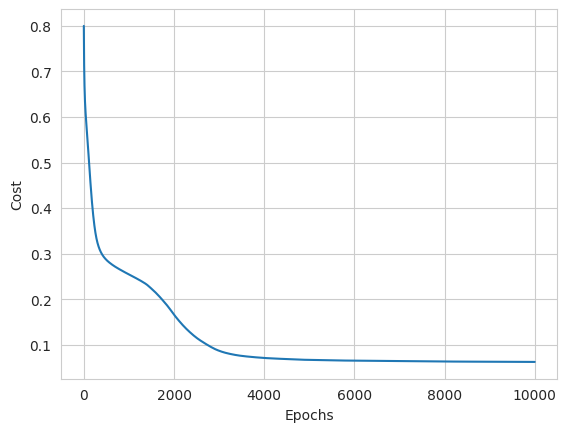

In [ ]:
# Plot the costs.
plot(costs)



**Step d:**  Make predictions on train and test sets and evaluate performance.

In [ ]:
# Make predictions on the train set.
predictions_train = planar_net.predict(X_train)

# Make predictions on the test set.
predictions_test = planar_net.predict(X_test)



In [ ]:
# Evaluate performance on the train set.
train_accuracy = planar_net.evaluate(predictions_train, Y_train)


In [ ]:
# Evaluate performance on the test set.
test_accuracy = planar_net.evaluate(predictions_test, Y_test)


**Step e:** Plot the dataset along with the predicted outputs and decision boundary.

<br>

Your classification and decision boundary plot should look like this:

<br>

![alt text](https://docs.google.com/uc?export=download&id=1g7p7NO8J3ICJNQ9tIK0Nj-lb-rh86SWe)


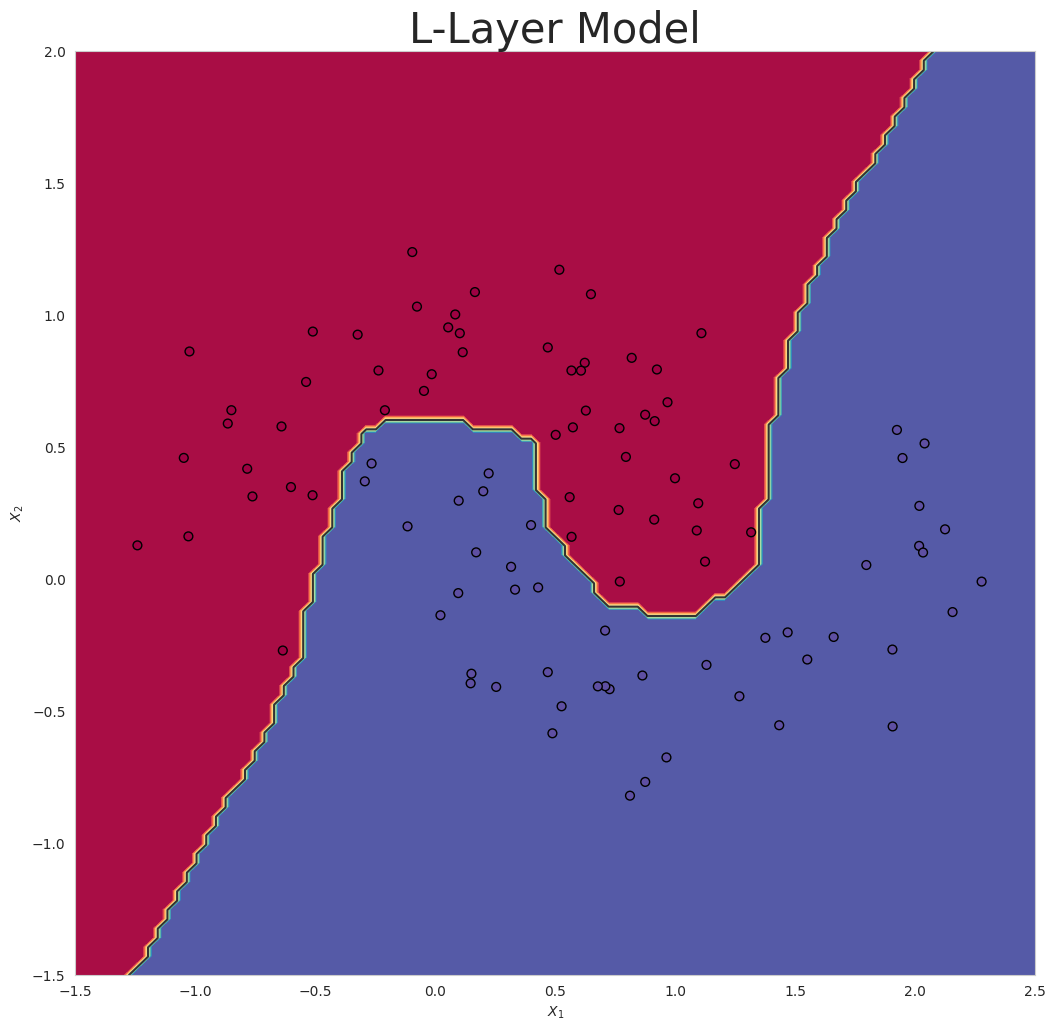

In [ ]:
preds = planar_net.predict(np.transpose(grid_2d))
preds = preds.reshape(preds.shape[1], 1)
X_test = X_test.T
Y_test = Y_test.T

# Plot decision boundary.
#make_plot(X_test, Y_test, "Deep Model", file_name='Final Decision Boundary for Deep Model.png', XX=XX, YY=YY, preds=preds)
make_plot(X_test, Y_test, "L-Layer Model", XX=XX, YY=YY, preds=preds)

### Part 3:  Visualize Learning

Now visualize the entire training process so you can see the training in action. To do this, we’ll be using a callback function.  Reference the lecture unit for more details on the visualization process and callback functions.
Let’s take a look at the callback_plot” function.
Most of the code here should be familiar, because this function takes in an index (that is, the epoch number), “X train” and “Y train”, then plots the decision boundary for the model at that epoch.
It then saves the .png to the file system in colab.
Now return to your colab implementation of the “fit” method.  Notice that we can pass a callback as an argument to fit().
If a callback function has been passed (that is, the  callback parameter is not “None”), then we execute the function on every 50th epoch. This means we will have many .png files saved to our system (for instance, for 2500 epochs, this will be 2500/50 = 50 images.
<br>
Now, reinitialize your model (to reset the parameters) with the same architecture as before.
**Note**, you will need to reload the dataset and rerun the preprocessing steps when switching the model.
<br>
Fit it to the data and remember to pass callback_plot” as the callback function, but keep everything else the same. Training should take a little longer (around 5 minutes) since we are visualizing.
Once you are done training, take a look at the next cell in your reference Colab script. It's not important to understand the specifics of what’s happening here, but this cell ties all the .png files together into a single gif.
Give your gif variable, "anim_file”, a descriptive name, such as “training.gif”.
Then run the cell.


In [ ]:
# Callback function to plot decision boundaries during training.
def callback_plot(index, X_train, Y_train):
    plot_title = "L Layer Model - It: {:05}".format(index)
    file_name = "numpy_model_{:05}.png".format(index//50)
    preds = planar_net.predict(np.transpose(grid_2d))
    preds = preds.reshape(preds.shape[1], 1)
    X_plt = X_train.T
    Y_plt = Y_train.T
    make_plot(X_plt, Y_plt, plot_title, file_name=file_name, XX=XX, YY=YY, preds=preds, dark=True)

In [ ]:
np.random.seed(0) #do not change - for grading purposes

# Instantiate your model.
planar_net = Model()
np.random.seed(0) #do not change - for grading purposes

# Instantiate your model.
planar_net = Model()

L1 = Dense(output_units=20, input_units=X.shape[1], activation='relu')

np.random.seed(0)


L2 = Dense(output_units=20, input_units=20, activation='relu')

np.random.seed(0)

L3 = Dense(output_units=20, input_units=20, activation='relu')

np.random.seed(0)


L4 = Dense(output_units=20, input_units=20, activation='relu')

np.random.seed(0)

L5 = Dense(output_units=20, input_units=20, activation='relu')

np.random.seed(0)

Lout = Dense(output_units=1, input_units=20, activation='sigmoid')
# Build a deep neural network.
planar_net.build([ L1,L2,L3,L4,L5,Lout
])


**Step a:** Create a folder to store the graphics files and change directory to it.

In [ ]:
#Change directory to the folder you want to store your files to
# e.g.:  %cd drive/MyDrive/Colab\ Notebooks/MLF-500/ML500_ProjVisualizationFiles/
# Use '%cd drive/'your path here...'

%cd /content/drive/MyDrive/Colab Notebooks/DNNVIZ

/content/drive/MyDrive/Colab Notebooks/DNNVIZ


In [ ]:
# Fit your model to the training data - REMEMBER to pass your callback function to fit().
# Use 10000 epochs and learning rate 0.01
costs = planar_net.fit(X_train, Y_train, 10000, 0.01,callback_plot(0,X_train,Y_train))


**Step b:** Run the following "stitcher" code to create an animation comprised of the generated graphics files

In [ ]:
# Create a gif.
# Credit to Tensorflow tutorials: https://www.tensorflow.org/tutorials/generative/dcgan#create_a_gif
import imageio
import glob

anim_file = 'training.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('numpy_model_*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

<ipython-input-98-d4b682dc6260>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-98-d4b682dc6260>:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


At this point you should have a training.gif file stored in the directory (folder) you specified in the previous cell.  Check out the visualization to see how your network converged to the decision boundary!

<br>

WHEN YOU COMPLETE THIS SECTION - STOP, AND UPLOAD YOUR COLAB SCRIPT FOR THIS ASSIGNMENT. THE OTHER PARTS IN THE COLAB SCRIPT WILL BE FOR SUBSEQUENT PROJECT/ASSIGNMENTS